# Script for fitting N14 from pulsed odmr

In [81]:
import pylab as pb
import time

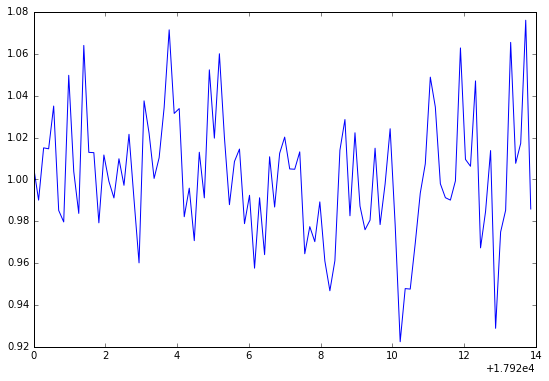

In [82]:
pb.plot(pulsedmeasurement.signal_plot_x, pulsedmeasurement.signal_plot_y)
pb.show()

In [83]:
# multiply the x axis with whatever scaling factor you have coming from the pulsedmeasurement gui
scale = 10**6
freqs = pulsedmeasurement.signal_plot_x * scale
norm_vals = pulsedmeasurement.signal_plot_y

In [84]:
results = fitlogic.make_N14_fit(freqs, norm_vals)

In [85]:
results.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr
l0_amplitude  -0.04171     -inf   -1e-06   0.0176     True     None
l0_center     1.793e+10     -inf      inf 5.508e+04     True     None
l0_contrast     -4.124     -inf      inf    1.735    False (l0_amplitude/offset)*100
l0_fwhm       4.988e+05     -inf      inf 1.643e+05    False 2*l0_sigma
l0_sigma      2.494e+05  3.5e+04 1.386e+07 8.213e+04     True     None
l1_amplitude  -0.06402     -inf   -1e-06  0.01915     True     None
l1_center     1.793e+10     -inf      inf 5.508e+04    False l0_center+2150000.0
l1_contrast     -6.329     -inf      inf    1.893    False (l1_amplitude/offset)*100
l1_fwhm       4.988e+05     -inf      inf        0    False 2*l1_sigma
l1_sigma      2.494e+05  3.5e+04 1.386e+07 8.213e+04    False l0_sigma
l2_amplitude  -0.06829     -inf   -1e-06  0.01918     True     None
l2_center     1.793e+10     -inf      inf 5.508e+04    False l0_center+4300000.0
l2_contrast     -6.751     -inf      inf 

In [86]:
# values of the center peaks
results.params['l0_center'].value, results.params['l1_center'].value, results.params['l2_center'].value

(17926049543.157814, 17928199543.157814, 17930349543.157814)

In [87]:
results.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr
l0_amplitude  -0.04171     -inf   -1e-06   0.0176     True     None
l0_center     1.793e+10     -inf      inf 5.508e+04     True     None
l0_contrast     -4.124     -inf      inf    1.735    False (l0_amplitude/offset)*100
l0_fwhm       4.988e+05     -inf      inf 1.643e+05    False 2*l0_sigma
l0_sigma      2.494e+05  3.5e+04 1.386e+07 8.213e+04     True     None
l1_amplitude  -0.06402     -inf   -1e-06  0.01915     True     None
l1_center     1.793e+10     -inf      inf 5.508e+04    False l0_center+2150000.0
l1_contrast     -6.329     -inf      inf    1.893    False (l1_amplitude/offset)*100
l1_fwhm       4.988e+05     -inf      inf        0    False 2*l1_sigma
l1_sigma      2.494e+05  3.5e+04 1.386e+07 8.213e+04    False l0_sigma
l2_amplitude  -0.06829     -inf   -1e-06  0.01918     True     None
l2_center     1.793e+10     -inf      inf 5.508e+04    False l0_center+4300000.0
l2_contrast     -6.751     -inf      inf 

In [88]:
a0 = results.params['offset'] + results.params['l0_amplitude']/(results.params['l0_sigma'] * np.pi)
a1 = results.params['offset'] + results.params['l1_amplitude']/(results.params['l1_sigma'] * np.pi)
a2 = results.params['offset'] + results.params['l2_amplitude']/(results.params['l2_sigma'] * np.pi)

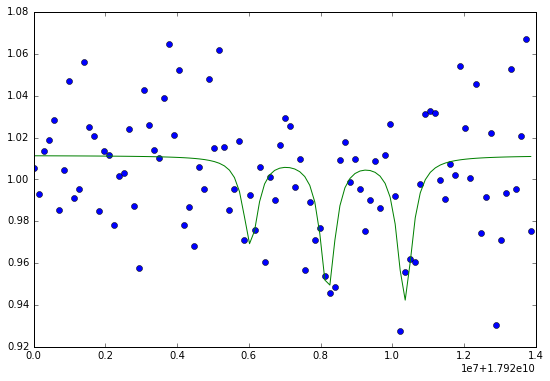

In [89]:
pb.plot(freqs, pulsedmeasurement.signal_plot_y, 'o')
pb.plot(freqs, results.eval())
pb.plot([results.params['l0_center'].value, results.params['l0_center'].value], [a0, results.params['offset'].value], 'r')
pb.plot([results.params['l1_center'].value, results.params['l1_center'].value], [a1, results.params['offset'].value], 'b')
pb.plot([results.params['l2_center'].value, results.params['l2_center'].value], [a2, results.params['offset'].value], 'k')
pb.show()

In [90]:
# calculate sum of contrast 
c0 = (results.params['offset'].value - a0) / results.params['offset']
c1 = (results.params['offset'].value - a1) / results.params['offset']
c2 = (results.params['offset'].value - a2) / results.params['offset']
c0, c1, c2

(5.263150061386231e-08, 8.077632333029053e-08, 8.616766592311144e-08)

In [91]:
# summed contrasts
c0 + c1 + c2

2.1957548986726428e-07